<a href="https://www.kaggle.com/code/atishaysinghai/space-titanic?scriptVersionId=130395972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Load the data
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test =  pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [4]:
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
# Count the number of rows and column in the data set
df_train.shape

(8693, 14)

In [7]:
df_test.shape

(4277, 13)

In [8]:
#Count the number of empty (NaN, NAN, na) values in each column
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
df_newtrain=df_train.drop(['Name','PassengerId'], axis = 1)

In [10]:
df_newtrain['RoomService']=df_newtrain['RoomService'].fillna(df_newtrain['RoomService'].mean())
df_newtrain['FoodCourt']=df_newtrain['FoodCourt'].fillna(df_newtrain['FoodCourt'].mean())
df_newtrain['VRDeck']=df_newtrain['VRDeck'].fillna(df_newtrain['VRDeck'].mean())
df_newtrain['CryoSleep']=df_newtrain['CryoSleep'].fillna(df_newtrain['CryoSleep'].mode()[0])
df_newtrain['HomePlanet']=df_newtrain['HomePlanet'].fillna(df_newtrain['HomePlanet'].mode()[0])
df_newtrain['Cabin']=df_newtrain['Cabin'].fillna(df_newtrain['Cabin'].mode()[0])
df_newtrain['Destination']=df_newtrain['Destination'].fillna(df_newtrain['Destination'].mode()[0])
df_newtrain['Age']=df_newtrain['Age'].fillna(df_newtrain['Age'].mean())
df_newtrain['VIP']=df_newtrain['VIP'].fillna(df_newtrain['VIP'].mode()[0])
df_newtrain['ShoppingMall']=df_newtrain['ShoppingMall'].fillna(df_newtrain['ShoppingMall'].mean())
df_newtrain['Spa']=df_newtrain['Spa'].fillna(df_newtrain['Spa'].mean())

In [11]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [12]:
df_newtest=df_test.drop(['Name','PassengerId'], axis = 1)

In [13]:
df_newtest.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [14]:
df_newtest['RoomService']=df_newtest['RoomService'].fillna(df_newtest['RoomService'].mean())
df_newtest['FoodCourt']=df_newtest['FoodCourt'].fillna(df_newtest['FoodCourt'].mean())
df_newtest['VRDeck']=df_newtest['VRDeck'].fillna(df_newtest['VRDeck'].mean())
df_newtest['CryoSleep']=df_newtest['CryoSleep'].fillna(df_newtest['CryoSleep'].mode()[0])
df_newtest['HomePlanet']=df_newtest['HomePlanet'].fillna(df_newtest['HomePlanet'].mode()[0])
df_newtest['Cabin']=df_newtest['Cabin'].fillna(df_newtest['Cabin'].mode()[0])
df_newtest['Destination']=df_newtest['Destination'].fillna(df_newtest['Destination'].mode()[0])
df_newtest['Age']=df_newtest['Age'].fillna(df_newtest['Age'].mean())
df_newtest['VIP']=df_newtest['VIP'].fillna(df_newtest['VIP'].mode()[0])
df_newtest['ShoppingMall']=df_newtest['ShoppingMall'].fillna(df_newtest['ShoppingMall'].mean())
df_newtest['Spa']=df_newtest['Spa'].fillna(df_newtest['Spa'].mean())

In [15]:
df_newtrain.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [16]:
df_newtest.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [17]:
df_newtrain.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [18]:
df_newtest.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.027384,601.162847,1508.609201,554.357251,1103.913087,1235.274606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,79.000000,143.000000,51.000000,83.000000,53.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [19]:
df_newtrain['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<AxesSubplot: xlabel='Transported', ylabel='count'>

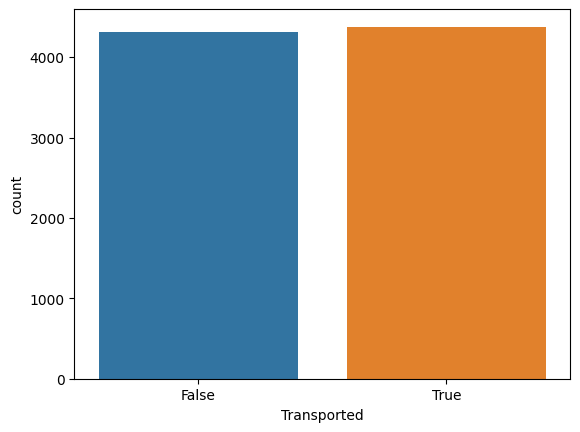

In [20]:
sns.countplot(x=df_newtrain['Transported'])

Train data is balanced

In [21]:
df=pd.concat([df_newtrain, df_newtest])

In [22]:
df.dtypes

HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported      object
dtype: object

In [23]:
# Encode the categorical data values
from sklearn.preprocessing import LabelEncoder as le
le_Y = le()
df.iloc[:,0]=le_Y.fit_transform(df.iloc[:,0].values)

/tmp/ipykernel_20/2455244891.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0]=le_Y.fit_transform(df.iloc[:,0].values)


In [24]:
df.iloc[:,1]=le_Y.fit_transform(df.iloc[:,1].values)

In [25]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [26]:
df.iloc[:,3]=le_Y.fit_transform(df.iloc[:,3].values)

/tmp/ipykernel_20/357793934.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,3]=le_Y.fit_transform(df.iloc[:,3].values)


In [27]:
a=df['Cabin'].unique()

In [28]:
a

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'D/296/P', 'D/297/P', 'G/1498/S'],
      dtype=object)

In [29]:
len(a)

9825

In [30]:
df.iloc[:,2]=le_Y.fit_transform(df.iloc[:,2].values)

/tmp/ipykernel_20/2282081397.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2]=le_Y.fit_transform(df.iloc[:,2].values)


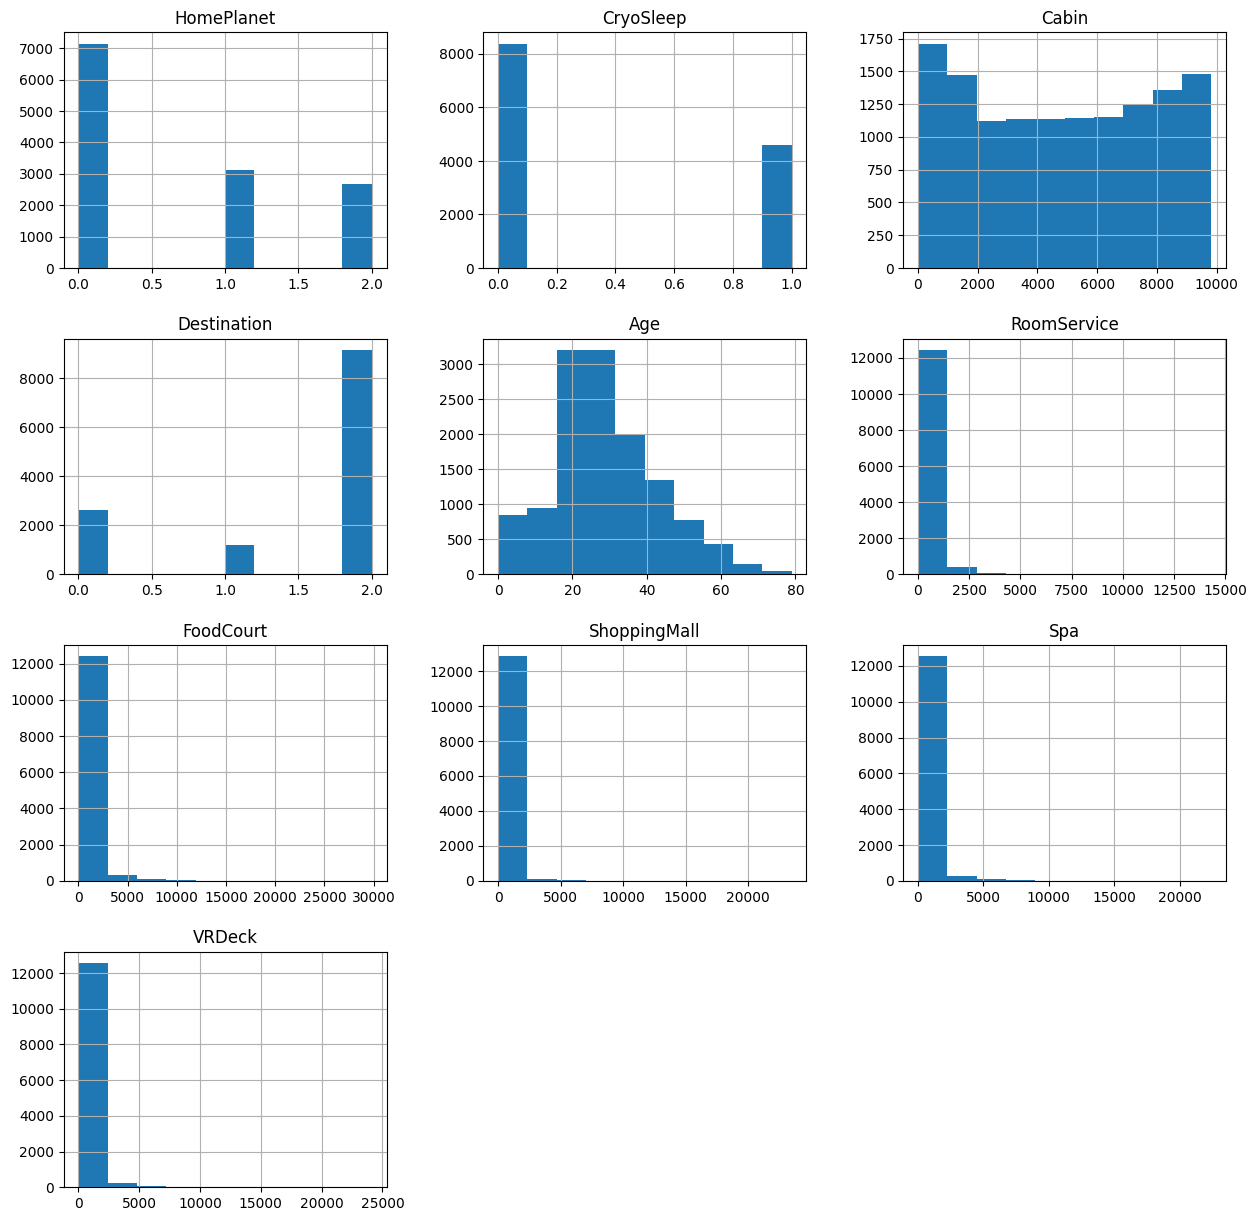

In [31]:
df.hist(figsize = (15,15))
plt.show()

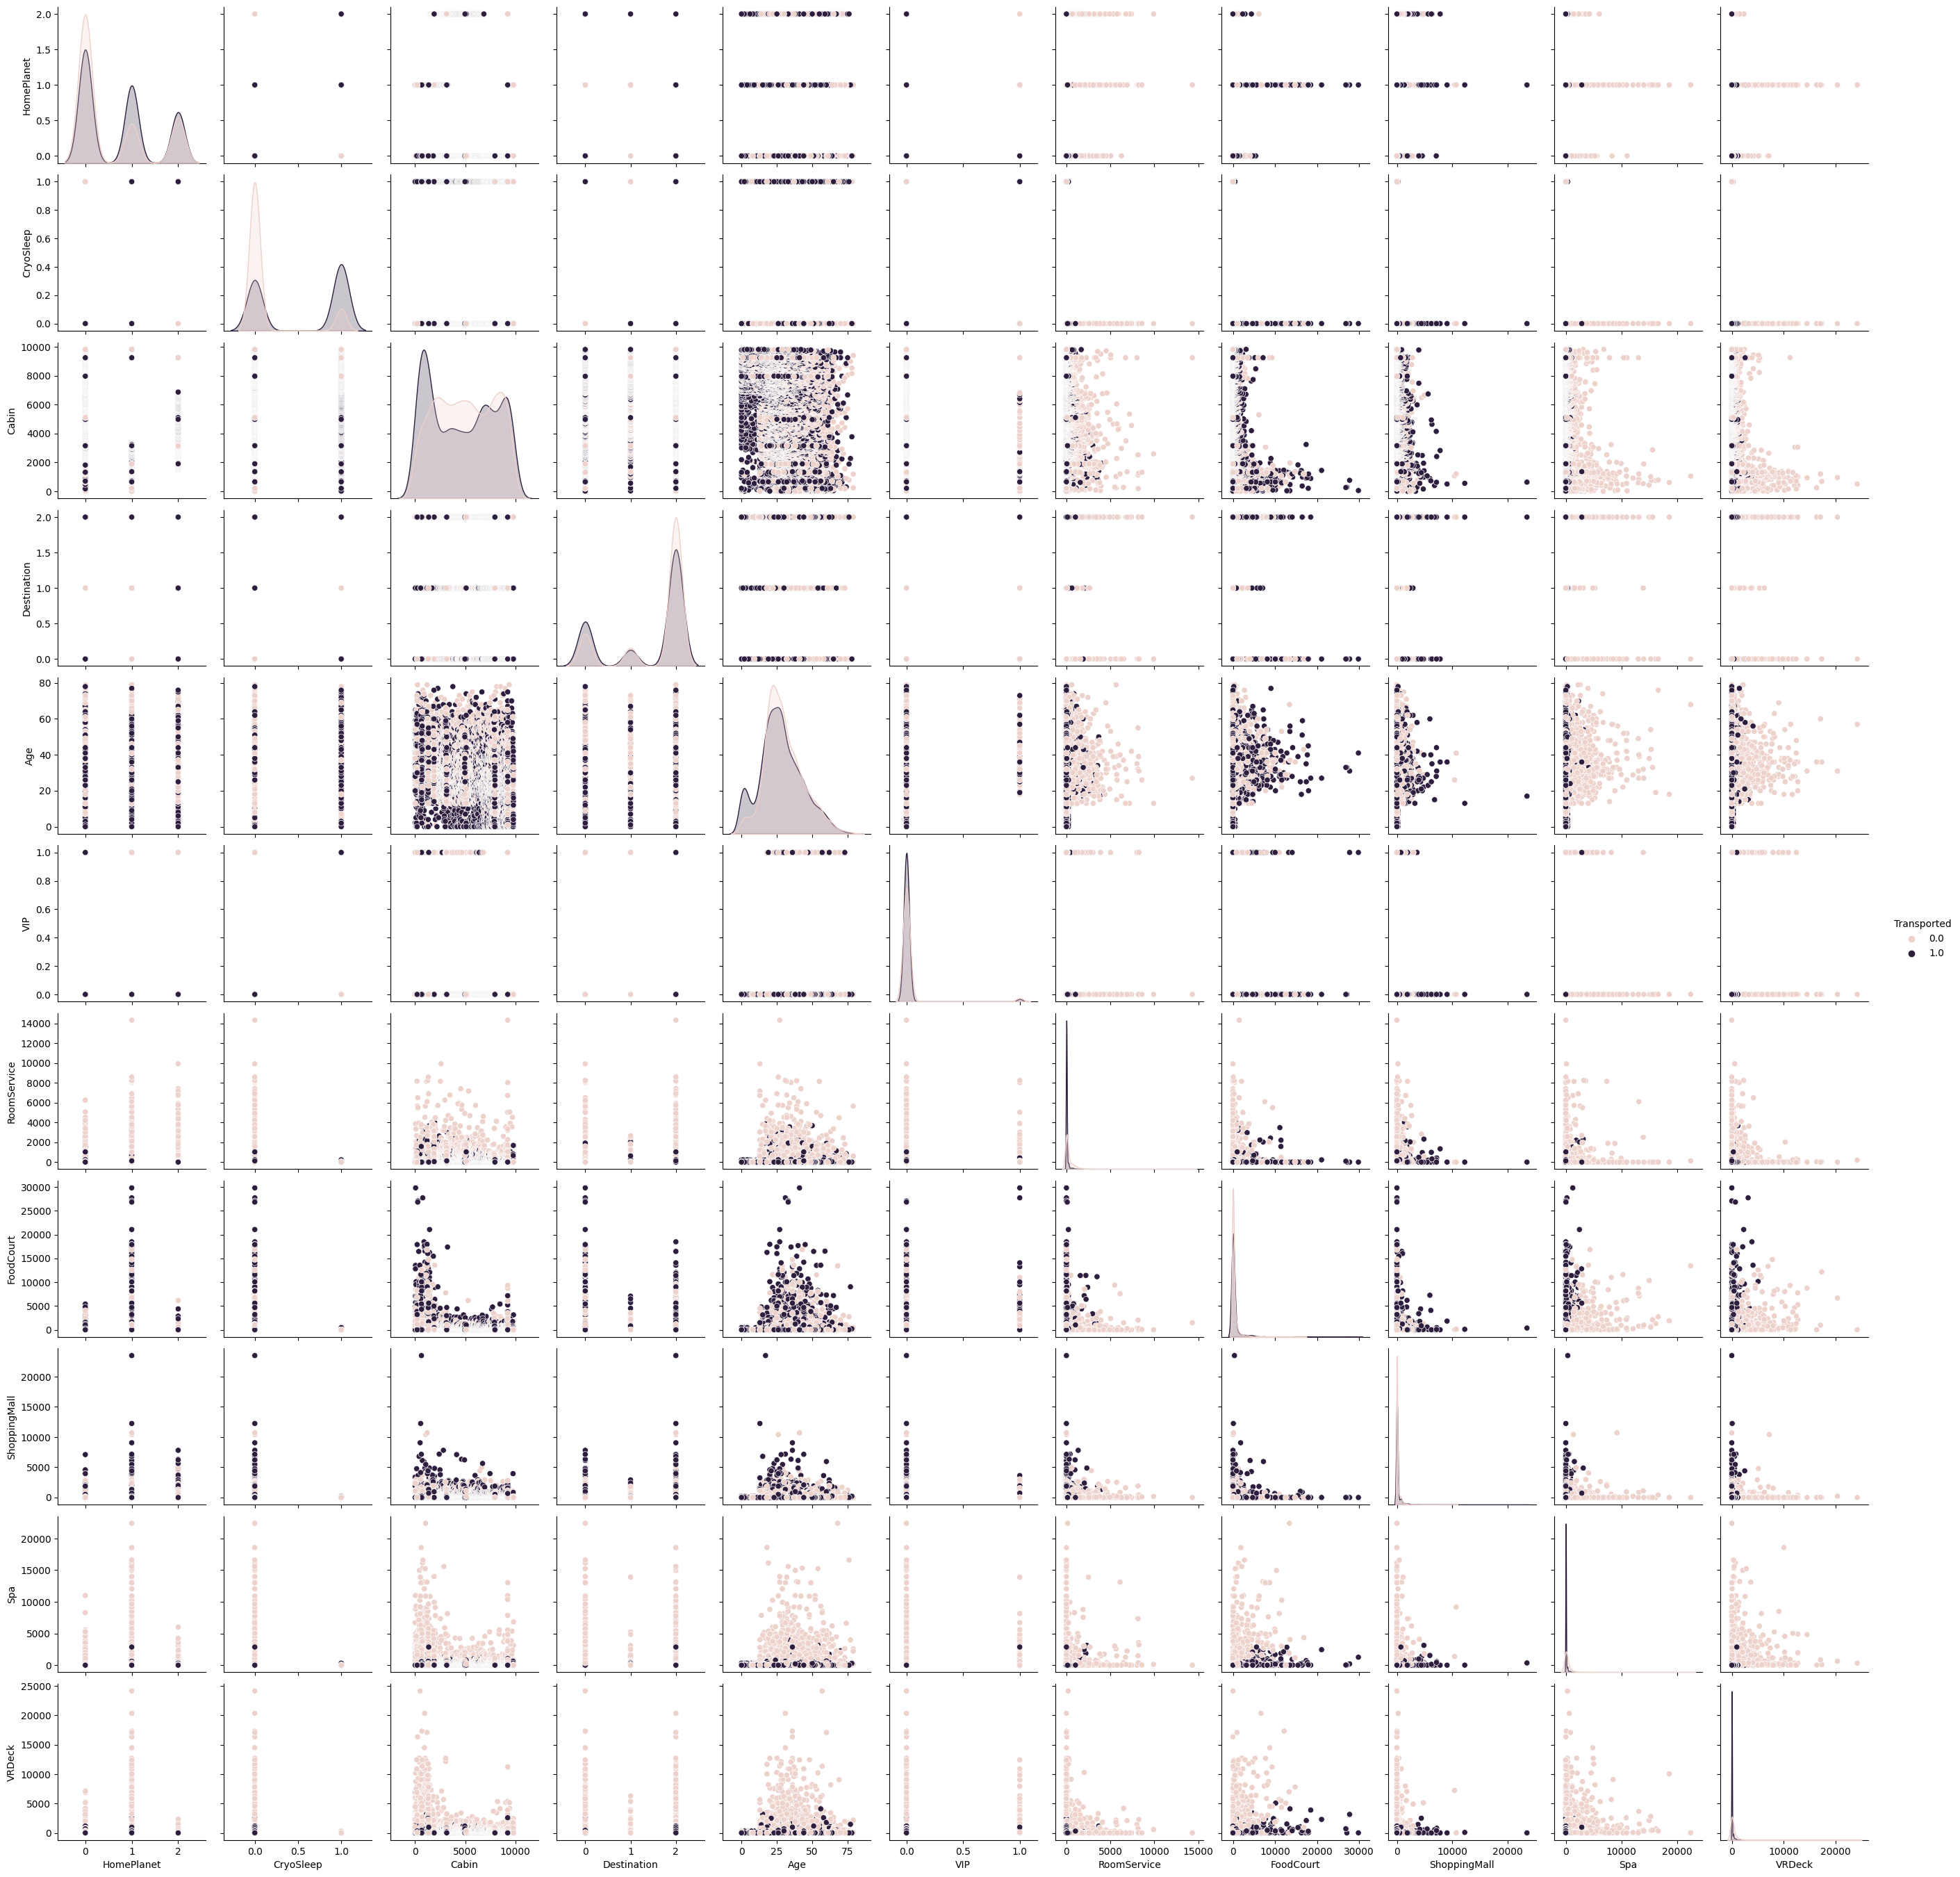

In [32]:
sns.pairplot(data =df.iloc[:,:], hue='Transported')

In [33]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
HomePlanet,1.000000,0.088630,-0.472081,0.033180,0.139805,0.119579,0.216152,0.064981,0.108769,0.052182,0.036324
CryoSleep,0.088630,1.000000,0.107562,-0.098933,-0.063820,-0.076891,-0.251753,-0.208122,-0.215170,-0.199174,-0.190275
Cabin,-0.472081,0.107562,1.000000,0.128771,-0.239711,-0.143827,-0.079649,-0.256165,-0.068340,-0.191475,-0.207619
Destination,0.033180,-0.098933,0.128771,1.000000,-0.010204,-0.037035,0.044923,-0.107589,0.025891,-0.067579,-0.071761
Age,0.139805,-0.063820,-0.239711,-0.010204,1.000000,0.080693,0.066093,0.121210,0.034171,0.115976,0.099863
VIP,0.119579,-0.076891,-0.143827,-0.037035,0.080693,1.000000,0.059391,0.122839,0.024183,0.080703,0.110162
RoomService,0.216152,-0.251753,-0.079649,0.044923,0.066093,0.059391,1.000000,-0.019726,0.055789,0.008809,-0.023425
FoodCourt,0.064981,-0.208122,-0.256165,-0.107589,0.121210,0.122839,-0.019726,1.000000,-0.001553,0.225852,0.240875
ShoppingMall,0.108769,-0.215170,-0.068340,0.025891,0.034171,0.024183,0.055789,-0.001553,1.000000,0.010386,0.004309
Spa,0.052182,-0.199174,-0.191475,-0.067579,0.115976,0.080703,0.008809,0.225852,0.010386,1.000000,0.145350


/tmp/ipykernel_20/4200030806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.iloc[:,0:].corr(),3), annot=True, fmt ='.0%',cmap = 'coolwarm',


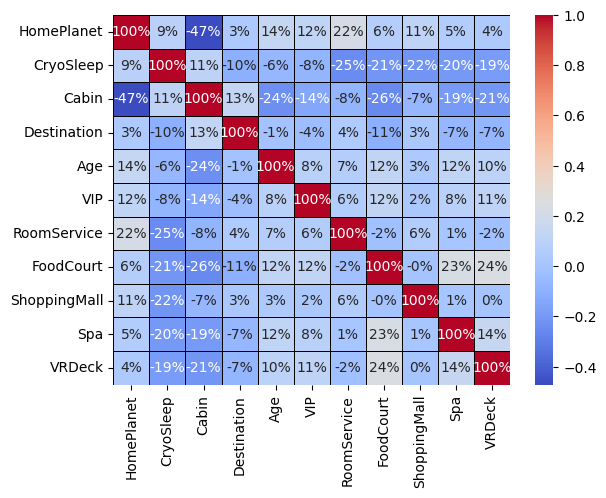

In [34]:
sns.heatmap(round(df.iloc[:,0:].corr(),3), annot=True, fmt ='.0%',cmap = 'coolwarm',
            linewidths = 0.5 ,linecolor='black' )
plt.show()

In [35]:
df_test_=df[df['Transported'].isnull()]
df_train_=df[~df['Transported'].isnull()]

In [36]:
df.iloc[:,11]=le_Y.fit_transform(df.iloc[:,11].values)

/tmp/ipykernel_20/934036769.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,11]=le_Y.fit_transform(df.iloc[:,11].values)


In [37]:
df.corr()['Transported']

HomePlanet      0.055892
CryoSleep       0.198872
Cabin          -0.022551
Destination    -0.033879
Age            -0.035636
VIP            -0.031808
RoomService    -0.106008
FoodCourt       0.014484
ShoppingMall    0.006707
Spa            -0.093572
VRDeck         -0.079797
Transported     1.000000
Name: Transported, dtype: float64

Shopping Mall, foodcourt is very less corelated with transported so we can drop them

In [38]:
df_trianf=df_train_.drop(['ShoppingMall', 'FoodCourt'], axis = 1)

In [39]:
df_testf = df_test_.drop(['ShoppingMall', 'FoodCourt'], axis = 1)

In [40]:
df_trianf.iloc[:,9]=le_Y.fit_transform(df_trianf.iloc[:,9].values)

/tmp/ipykernel_20/553938165.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_trianf.iloc[:,9]=le_Y.fit_transform(df_trianf.iloc[:,9].values)


In [41]:
df_trianf

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Spa,VRDeck,Transported
0,1,0,208,2,39.0,False,0.0,0.0,0.0,0
1,0,0,3241,2,24.0,False,109.0,549.0,44.0,1
2,1,0,1,2,58.0,True,43.0,6715.0,49.0,0
3,1,0,1,2,33.0,False,0.0,3329.0,193.0,0
4,0,0,3243,2,16.0,False,303.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,205,0,41.0,True,0.0,1643.0,74.0,0
8689,0,1,7962,1,18.0,False,0.0,0.0,0.0,0
8690,0,0,7968,2,26.0,False,0.0,1.0,0.0,1
8691,1,0,3157,0,32.0,False,0.0,353.0,3235.0,0


In [42]:
#Split the data set into independent (X) and dependent (Y) data sets
X=df_trianf.iloc[:,0:9].values
Y=df_trianf.iloc[:,9].values

In [43]:
#Split the data set into 67% training and 33% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [44]:
#Scale the data (Feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [45]:
# Create a function for the models
def models(X_train, Y_train):

  # Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state = 0 )
  forest.fit(X_train, Y_train)

  #Print the models accuracy on the training data
  print('[0]Logistic Regreesion Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

  return log, tree, forest

In [46]:
#Getting all the models
model = models(X_train, Y_train)

[0]Logistic Regreesion Training Accuracy: 0.7671703296703297
[1]Decision Tree Classifier Training Accuracy: 0.9996565934065934
[2]Random Forest Classifier Training Accuracy: 0.9824862637362637


In [47]:
#Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print ('Model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)
  print('Testing Accuracy', (TP+TN)/(TP + TN + FN + FP) )
  print()

Model 0
[[1087  351]
 [ 314 1117]]
Testing Accuracy 0.7682119205298014

Model 1
[[1022  416]
 [ 354 1077]]
Testing Accuracy 0.7316138027187173

Model 2
[[1175  263]
 [ 398 1033]]
Testing Accuracy 0.7696061345416522



we use Random Forest Classifier model to predict

In [48]:
X_test = df_testf.iloc[:,0:9].values
y_pred=model[2].predict(X_test)

In [49]:
y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [50]:
df_testf['Transported']=y_pred

In [51]:
df_testf

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Spa,VRDeck,Transported
0,0,1,8298,2,27.000000,False,0.0,0.0,0.0,1
1,0,0,5564,2,19.000000,False,0.0,2823.0,0.0,0
2,1,1,856,0,31.000000,False,0.0,0.0,0.0,1
3,1,0,858,2,38.000000,False,0.0,181.0,585.0,0
4,0,0,5785,2,20.000000,False,10.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
4272,0,1,7956,2,34.000000,False,0.0,0.0,0.0,1
4273,0,0,7995,2,42.000000,False,0.0,10.0,144.0,0
4274,2,1,1905,0,28.658146,False,0.0,0.0,0.0,1
4275,1,0,1906,2,28.658146,False,0.0,0.0,523.0,0


In [52]:
df_testf['Transported'] = df_testf['Transported'].replace({1: True, 0: False})

In [53]:
df_testf

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Spa,VRDeck,Transported
0,0,1,8298,2,27.000000,False,0.0,0.0,0.0,True
1,0,0,5564,2,19.000000,False,0.0,2823.0,0.0,False
2,1,1,856,0,31.000000,False,0.0,0.0,0.0,True
3,1,0,858,2,38.000000,False,0.0,181.0,585.0,False
4,0,0,5785,2,20.000000,False,10.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...
4272,0,1,7956,2,34.000000,False,0.0,0.0,0.0,True
4273,0,0,7995,2,42.000000,False,0.0,10.0,144.0,False
4274,2,1,1905,0,28.658146,False,0.0,0.0,0.0,True
4275,1,0,1906,2,28.658146,False,0.0,0.0,523.0,False


In [54]:
df_test['PassengerId']

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [55]:
df_testf['PassengerId'] = df_test['PassengerId']

In [56]:
df_testf

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Spa,VRDeck,Transported,PassengerId
0,0,1,8298,2,27.000000,False,0.0,0.0,0.0,True,0013_01
1,0,0,5564,2,19.000000,False,0.0,2823.0,0.0,False,0018_01
2,1,1,856,0,31.000000,False,0.0,0.0,0.0,True,0019_01
3,1,0,858,2,38.000000,False,0.0,181.0,585.0,False,0021_01
4,0,0,5785,2,20.000000,False,10.0,0.0,0.0,False,0023_01
...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,7956,2,34.000000,False,0.0,0.0,0.0,True,9266_02
4273,0,0,7995,2,42.000000,False,0.0,10.0,144.0,False,9269_01
4274,2,1,1905,0,28.658146,False,0.0,0.0,0.0,True,9271_01
4275,1,0,1906,2,28.658146,False,0.0,0.0,523.0,False,9273_01


In [57]:
df_submission=df_testf.drop(['HomePlanet', 'CryoSleep','Cabin','Destination','Age','VIP','RoomService','Spa','VRDeck'], axis =1)

In [58]:
df_submission.to_csv("/kaggle/working/submissiom.csv",index=False)

<AxesSubplot: xlabel='Transported', ylabel='count'>

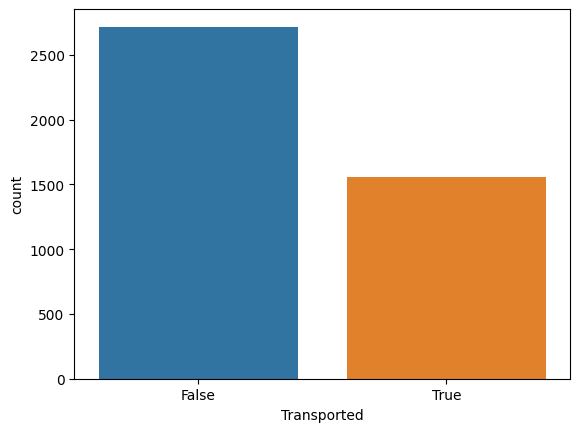

In [59]:
sns.countplot(x=df_submission['Transported'])